In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\prady\Desktop\Projects\archive (1)\aps_failure_training_set.csv")
df_test = pd.read_csv(r"C:\Users\prady\Desktop\Projects\archive (1)\aps_failure_test_set.csv")

In [3]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'neg' else 1)
df_test['class'] = df_test['class'].apply(lambda x: 0 if x == 'neg' else 1)
y_train = df['class']
y_test = df_test['class']

In [5]:
df = df.applymap(lambda x: None if x=='na' else x)
df_test = df_test.applymap(lambda x: None if x=='na' else x)
Nan_counts = df.isnull().sum(axis = 0)
Nan_counts = (Nan_counts/len(df)) * 100
Nan_counts = Nan_counts[Nan_counts>20].sort_values()

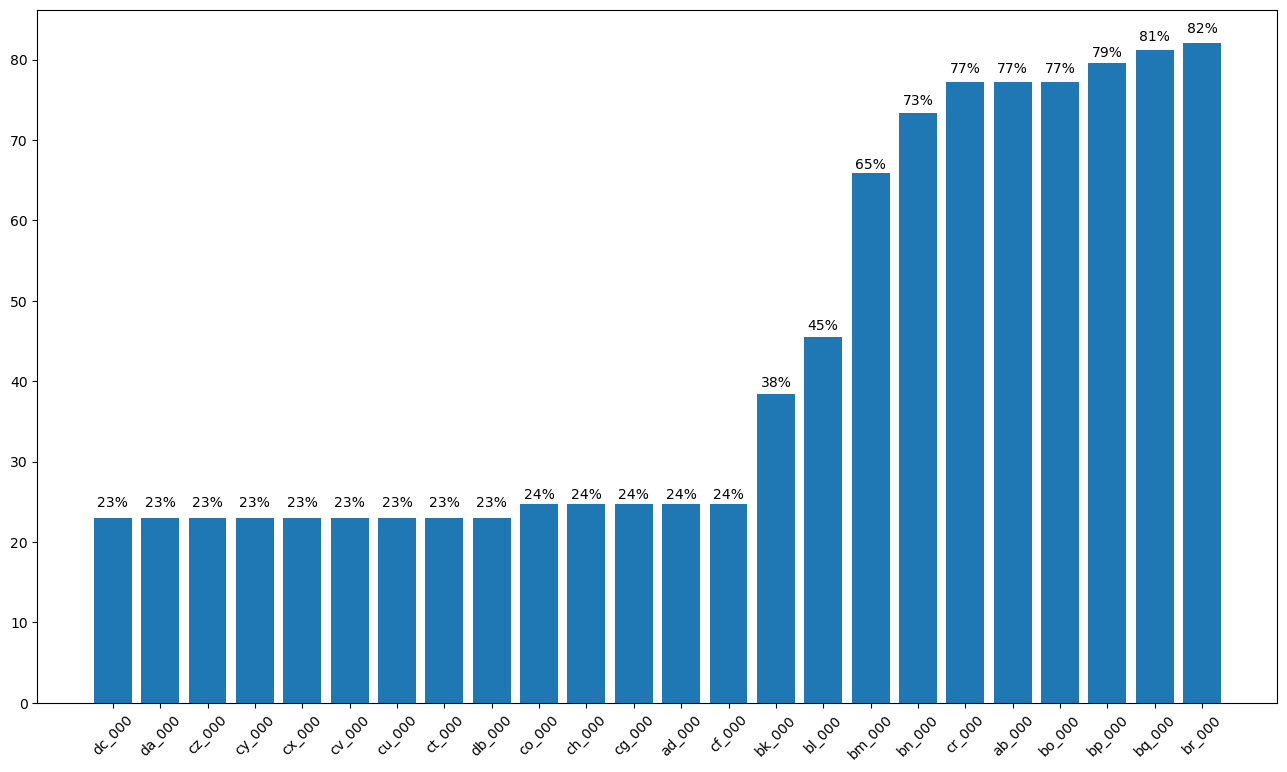

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
plt.bar(Nan_counts.index,Nan_counts.values)
for i, value in enumerate(Nan_counts.values.astype(int)):
    plt.text(i, value + 1, str(value)+ '%', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [7]:
Columns_to_drop =  list(Nan_counts[Nan_counts>50].index)
#list(Columns_to_drop)
df = df.drop(labels =Columns_to_drop, axis =1)
df_test = df_test.drop(labels =Columns_to_drop, axis =1)

We need to still handle a lot of missing data, else it will affect the model effectiveness. 
There are a lot of different types of missing data like Missing completely at Random(MCAR) , Missing at Random(MAR), Missing not at Random (MNAR). MCAR, and MAR are randomly missing values with MAR having some influence from other dependent data whereas MNAR might be because of some unknown factor(data). 

Examples:
MCAR - Reason of missing value - Human Error, Machine failure etc
MAR - Reason of missing value -  Human Error, Machine failure etc but dependent on other dependent data. Woman missing to fill their age is dependent on gender. Machine malfunction above certain temp is dependent on temp feature. 
MCAR - People in poverty might not know age which could help us predict disease! So, filling these NaN can make the model biased.  

We assume this data as MAR considering the nature of the data, and leverage MICE technique which uses other features to impute missing data effectively.  

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
Imputer = IterativeImputer(max_iter = 10, random_state = 0).fit(df)
Imputed_values = Imputer.transform(df)
Imputed_values_test = Imputer.transform(df_test)

C:\Users\prady\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [10]:
df_imputed = pd.DataFrame(Imputed_values, columns=df.columns)
df_imputed_test = pd.DataFrame(Imputed_values_test, columns=df_test.columns)
df_imputed

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.000000e+00,190260.588896,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [11]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
class,60000.0,1.666667e-02,1.280202e-01,0.000000e+00,0.0,0.0,0.00000,1.000000e+00
aa_000,60000.0,5.933650e+04,1.454301e+05,0.000000e+00,834.0,30776.0,48668.00000,2.746564e+06
ac_000,60000.0,3.680925e+08,4.179671e+09,-5.173038e+10,18.0,174.0,1428.00000,7.309175e+11
ad_000,60000.0,1.901151e+05,3.504519e+07,-9.536537e+06,42.0,288.0,8164.50000,8.584298e+09
ae_000,60000.0,-3.491496e+00,1.733871e+03,-3.128095e+05,0.0,0.0,0.00000,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,60000.0,3.462706e+05,1.718366e+06,0.000000e+00,118.0,43587.0,173224.50000,1.195801e+08
ee_008,60000.0,1.387305e+05,4.469894e+05,0.000000e+00,0.0,4474.0,138738.28176,1.926740e+07
ee_009,60000.0,8.388993e+03,4.720424e+04,0.000000e+00,0.0,0.0,2366.00000,3.810078e+06
ef_000,60000.0,4.792423e-02,1.382593e+01,-2.325338e+03,0.0,0.0,0.00000,5.046757e+02


### From above statistics, we can gain below insights:
#### There are a lot of features which has majority of their values as 0. Let's do some more analysis to see if we can just drop them. 
#### We need to scale the data as min and maximum of each features is varying a lot which might affect our model
#### Also we can see if we have any columns with very low standard deviation. 

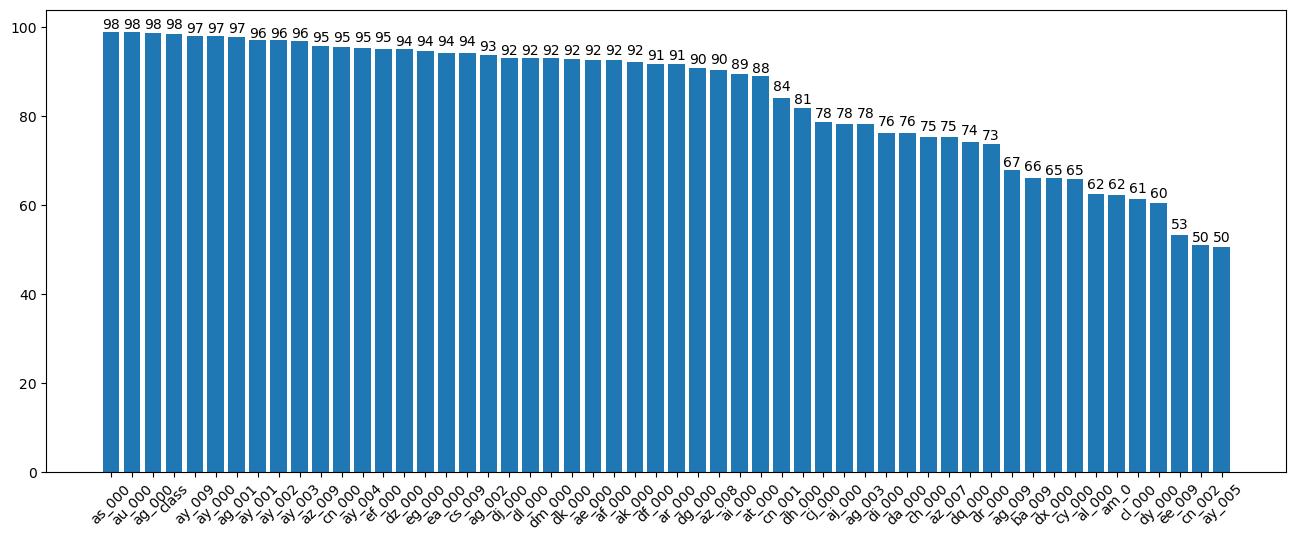

In [12]:
df_imputed_0_counts = (df_imputed == 0).sum(axis=0)
df_imputed_0_counts = (df_imputed_0_counts / len(df)) * 100
df_imputed_0_above50 = df_imputed_0_counts[df_imputed_0_counts>50].sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
plt.bar(df_imputed_0_above50.index,df_imputed_0_above50.values)
for i, value in enumerate(df_imputed_0_above50.values.astype(int)):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

#### Okay so a lot of columns has more than 90% of 0s!! So I can think of just removing them. 
#### But wait, Don't we have a class imbalance issue? The positive class is just 10%. So, What if those few non zero values have some information about the minority class?
#### Let's do more analysis before dropping these features. Let's calculate the percentage of non zero values in these columns having 'class' == 1 (Minority) 

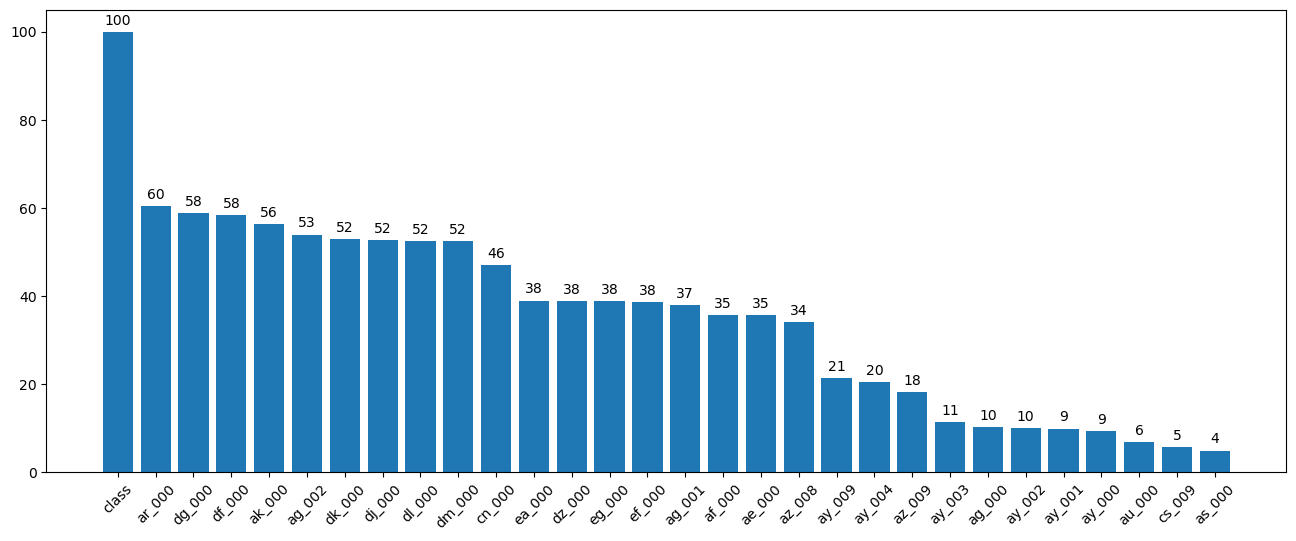

In [13]:
df_imputed_0_above90 =  df_imputed_0_counts[df_imputed_0_counts>90].sort_values(ascending=False)
Non_0_in_minority = {}
Count_of_minority = (df_imputed['class'] == 1).sum()
for x in df_imputed_0_above90.index:
    Non_0_in_minority[x] = ((((df_imputed[x] != 0 ) & (df_imputed['class'] == 1)).sum())/ Count_of_minority ) * 100
    
Non_0_in_minority = pd.Series(Non_0_in_minority).sort_values(ascending =False)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
plt.bar(Non_0_in_minority.index,Non_0_in_minority.values)
for i, value in enumerate(Non_0_in_minority.values):
    plt.text(i, value + 1, str(value.astype(int)), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()



#### We can clearly see some of these columns adding as high as 60% of information to the minority class. So it would be risky to delete all those columns. So let's not drop any columns for now. 

#### Let's now see what's happening with standard deviation.

In [14]:
df_imputed.describe().T[df_imputed.describe().T['std'] < 1]

,count,mean,std,min,25%,50%,75%,max
class,60000.0,1.666667e-02,0.128020,0.000000e+00,0.0,0.0,0.0,1.000000e+00
cd_000,60000.0,1.209600e+06,0.000000,1.209600e+06,1209600.0,1209600.0,1209600.0,1.209600e+06
ch_000,60000.0,-3.200440e-04,0.274467,-4.554025e+01,0.0,0.0,0.0,2.633779e+01


#### We can drop cd_000 as the standard deviation is 0.

In [15]:
y_train = df_imputed['class']
y_test = df_imputed_test['class']
df_imputed = df_imputed.drop(['cd_000','class'],axis=1)
df_imputed_test = df_imputed_test.drop(['cd_000','class'],axis=1)

#### 162 features is still a lot I feel. Lets try to understand how is the correlation between features!

<AxesSubplot:>

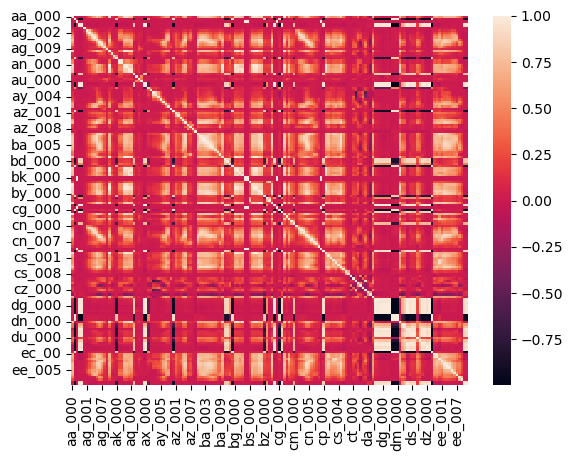

In [16]:
sns.heatmap(df_imputed.corr())

#### We can see a lot of strongly correlated features. But since we don't have any knowledge about features and considering the number of features it's best to not delete any more columns manually. We can consider more robust techniques like PCA. 

In [17]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler().fit(df_imputed)
X_train = Scale.transform(df_imputed)
X_test = Scale.transform(df_imputed_test)
X_train

array([[ 1.19381409e-01,  4.21714727e-01, -5.41691017e-03, ...,
        -1.77718407e-01, -3.46628713e-03, -4.48993789e-04],
       [-1.80696612e-01, -8.80680766e-02,  4.15215065e-06, ...,
        -1.45941339e-01, -3.46628713e-03, -4.48993789e-04],
       [-1.25810664e-01, -8.80680221e-02, -5.42204644e-03, ...,
        -1.66829465e-01, -3.46628713e-03, -4.48993789e-04],
       ...,
       [-4.07240391e-01,  4.21714726e-01, -5.42438629e-03, ...,
        -1.77718407e-01, -3.46628713e-03, -4.48993789e-04],
       [ 1.44094526e-01,  4.21714726e-01, -5.41080372e-03, ...,
         8.05088982e+00, -3.46628713e-03, -4.48993789e-04],
       [-1.31435408e-01, -8.80679096e-02, -5.40698005e-03, ...,
        -1.74371222e-01, -3.46628713e-03, -4.48993789e-04]])

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
pca = PCA(n_components=n_components).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [19]:
X_train

array([[ 1.95787374e+00,  1.26114946e-01, -1.39712354e+00, ...,
         2.65654085e-01,  1.28388645e-01,  1.58636967e-01],
       [-5.51138881e-01, -1.91831327e-01, -4.08739372e-01, ...,
        -1.46177536e-01,  1.00369093e-01, -2.30223105e-03],
       [-1.17298035e+00, -1.24060473e-01,  6.68906170e-03, ...,
        -5.40298935e-02,  2.69942204e-01,  2.04551026e-01],
       ...,
       [-3.00352368e+00, -2.33436012e-01,  2.59307309e-01, ...,
         3.40622345e-03, -9.07096712e-02, -1.53280854e-02],
       [ 1.96494679e+00,  2.32477385e-01, -2.72837302e+00, ...,
        -5.62946150e-01, -4.23697924e-01, -1.10296647e+00],
       [-7.49467674e-01, -9.80367510e-02, -4.75479322e-01, ...,
         4.77375017e-02,  1.21348041e-01,  1.20621536e-02]])

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 10000).fit(X_train,y_train)
y_pred = LR.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9875


In [21]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')


In [22]:
print(recall,precision,f1s)

0.9875 0.9864025640369167 0.9863101331383172


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15586,    39],
       [  161,   214]], dtype=int64)

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 10000).fit(x_smote, y_smote)
y_pred = LR.predict(X_test)
print(accuracy_score(y_pred,y_test))
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
print(recall,precision,f1s)

0.97075
0.97075 0.9847616544083239 0.9756629279045643


In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(x_smote, y_smote)
y_pred = DT.predict(X_test)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
print(recall,precision,f1s)
print(accuracy_score(y_pred,y_test))

0.9790625 0.9826617500028277 0.9805357805363871
0.9790625


In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(x_smote, y_smote)
y_pred = RF.predict(X_test)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
print(recall,precision,f1s)
print(accuracy_score(y_pred,y_test))

0.98775 0.9892058373945785 0.9883116664992924
0.98775


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [2, 8, 16],'n_estimators' : [64, 128, 256]}

# perform grid search cross-validation to find best hyperparameters
RF = RandomForestClassifier()
grid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_smote, y_smote)

# evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
print("Best hyperparameters: ", grid_search.best_params_)
print(accuracy,recall,precision,f1s)

Best hyperparameters:  {'max_depth': 16, 'n_estimators': 256}
0.985875 0.985875 0.9890095325583896 0.9869670608356479


In [32]:
confusion_matrix(y_test, y_pred)

array([[15597,    28],
       [  136,   239]], dtype=int64)